In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import pickle
import pandas as pd
import scipy.stats as st


# my preferred settings
mpl.rc('lines',linewidth = 1.5)
mpl.rc('font',size = 14)
mpl.rc('axes',labelsize = 16, linewidth=1.25)
mpl.rc('xtick',labelsize = 16)
mpl.rc('ytick',labelsize = 16)
# enable math fonts
mpl.rc('mathtext', default = 'regular')
plt.rcParams['savefig.dpi'] = 400 

from sbin.complexity import gap_complexity, ecdf_confidence
import seaborn as sns 

from sbin.sbin import suppression_factor_simple
from sbin.sbin import suppression_factor 
from sbin.sbin import suppression_factor_50   





In [2]:
with open("filtered_data.pkl", "rb") as f:
     data = pickle.load(f)
              
close = data["close"]
good = data["good"]
db_filtered = data["db_filtered"]
kois_filtered = data["kois_filtered"]
kois_good = data["kois_good"]
cks_filtered = data["cks_filtered"]
cks_good = data["cks_good"]

with open("filtered_data_thebault.pkl", "rb") as f:
     tb_filtered = pickle.load(f)['db_filtered']
        

In [3]:
tb_filtered

,Most,Alternate,Mass,Mass_1,Distance,Method,semi-major,eccentricicy,Number,semi-major_1,...,teff,source_id,parallax,parallax_over_error,kepler_gaia_ang_dist,phot_g_mean_mag,ruwe,bedell_cat,DiskAU,SnowAU
2,Kepler968,KOI1833,0.760,0.39,312.0,1,5.30,99.0,3,0.0634,...,4402.0,2.132152e+18,3.453282,246.269897,0.189787,14.238413,1.027291,good,2.319766,1.558925
3,Kepler968,KOI1833,0.760,0.39,312.0,1,5.30,99.0,3,0.0634,...,4402.0,2.132152e+18,3.453282,246.269897,0.189787,14.238413,1.027291,good,2.319766,1.558925
4,Kepler968,KOI1833,0.760,0.39,312.0,1,5.30,99.0,3,0.0634,...,4402.0,2.132152e+18,3.453282,246.269897,0.189787,14.238413,1.027291,good,2.319766,1.558925
5,Kepler1649,KOI3138,0.310,0.19,92.4,1,5.54,99.0,2,0.0960,...,2703.0,2.125699e+18,10.780833,289.498596,0.073782,16.243011,1.076815,good,2.337341,0.587783
6,Kepler1649,KOI3138,0.310,0.19,92.4,1,5.54,99.0,2,0.0960,...,2703.0,2.125699e+18,10.780833,289.498596,0.073782,16.243011,1.076815,good,2.337341,0.587783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,Kepler52,KOI775,0.624,0.50,321.5,1,9842.00,99.0,3,0.1820,...,4126.0,2.133590e+18,3.128331,163.341995,0.062209,15.040696,1.028861,good,3919.471245,1.369568
424,Kepler52,KOI775,0.624,0.50,321.5,1,9842.00,99.0,3,0.1820,...,4126.0,2.133590e+18,3.128331,163.341995,0.062209,15.040696,1.028861,good,3919.471245,1.369568
425,Kepler52,KOI775,0.624,0.50,321.5,1,9842.00,99.0,3,0.1820,...,4126.0,2.133590e+18,3.128331,163.341995,0.062209,15.040696,1.028861,good,3919.471245,1.369568
426,Kepler614,KOI587,0.850,0.50,571.0,1,9861.00,99.0,1,0.1050,...,5258.0,2.085520e+18,1.870353,117.367470,0.050430,14.532136,0.967129,good,4196.341616,2.224161


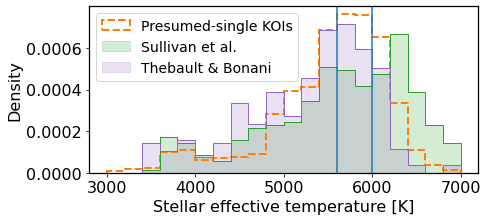

In [4]:
nbins = 20
histrange = (3000,7000)
fig, axes = plt.subplots(1, 1, figsize=(7,3.3), sharex=True, sharey=True)

plt.hist(kois_filtered['teff'], 
             range=histrange, bins=nbins, density=True, 
             histtype='step', lw=2, linestyle='--', color='C1',
            label='Presumed-single KOIs')

#plt.hist(cks_filtered['teff'], 
#             range=histrange, bins=nbins, density=True, 
#              histtype='step',lw=2, linestyle='--', color='C1',
#        label='CKS')

plt.hist(db_filtered['Teff1'], label='Sullivan et al.',
             range=histrange, bins=nbins, density=True, 
             histtype='stepfilled',  edgecolor='C2', facecolor='C2', alpha=0.2)
plt.hist(tb_filtered['teff'], label='Thebault & Bonani',
             range=histrange, bins=nbins, density=True, 
             histtype='stepfilled',  edgecolor='C4', facecolor='C4', alpha=0.2)

plt.hist(db_filtered['Teff1'], 
             range=histrange, bins=nbins, density=True, 
             histtype='step',  edgecolor='C2')
plt.hist(tb_filtered['teff'], 
             range=histrange, bins=nbins, density=True, 
             histtype='step',  edgecolor='C4')


plt.ylabel('Density')
plt.xlabel('Stellar effective temperature [K]')
plt.legend(loc='upper left')
plt.tight_layout()

plt.axvline(5600)
plt.axvline(6000)

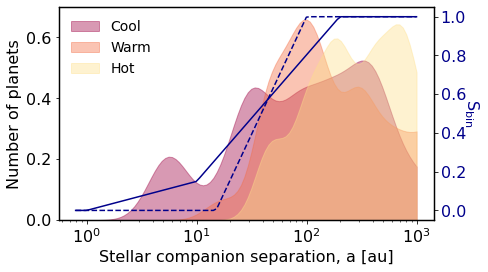

In [5]:
from scipy.stats import gaussian_kde

# ----------------------------------------------
# Set-up
# ----------------------------------------------

fig, ax1 = plt.subplots(figsize=(7, 4))

# defining the limits of the semi-major axis
a_values = np.logspace(-0.1,3, 100)
bins = np.logspace(np.log10(a_values.min()), np.log10(a_values.max()), 15)

# calculate suppression factors
S_values = suppression_factor(a_values)
S_values2 = suppression_factor_simple(a_values)


# ----------------------------------------------
# First axis -- histogram of planet radii
# ----------------------------------------------



# define the samples
cool = tb_filtered['semi-major'][tb_filtered['teff']<4500] # super-Earths
warm = tb_filtered['semi-major'][(tb_filtered['teff']>5500) & (tb_filtered['teff']<5800)] # in-betweens
hot = tb_filtered['semi-major'][tb_filtered['teff']>6000] # mini-Neptunes

def calc_pdf(sample):
    kde = gaussian_kde(np.log10(sample), bw_method=0.2)
    pdf = kde(np.log10(a_values))
    return pdf

ax1.fill_between(a_values, calc_pdf(cool), color='#9e0142', alpha=0.4,
                 label='Cool')
ax1.fill_between(a_values, calc_pdf(warm), color='#f46d43', alpha=0.4,
                 label='Warm')
ax1.fill_between(a_values, calc_pdf(hot), color='#fee08b', alpha=0.4,
                 label='Hot')


ax1.set_xscale('log') # Set the x-axis to logarithmic scale
ax1.set_ylabel('Number of planets', color='k')
ax1.tick_params(axis='y', labelcolor='k')

ax1.set_xlabel('Stellar companion separation, a [au]')
plt.legend(edgecolor='None', facecolor='w', loc='upper left')
plt.ylim(0,0.7)


# ----------------------------------------------
# Second axis -- the suppression equation
# ----------------------------------------------

ax2 = ax1.twinx()

ax2.plot(a_values, S_values, color='darkblue', linestyle='-', label='Suppression Factor')
ax2.plot(a_values, S_values2, color='darkblue', linestyle='--', label='Suppression Factor')
ax2.tick_params(axis='y', labelcolor='darkblue')

ax2.set_ylabel('$S_\mathrm{bin}$', rotation=270, color='darkblue', labelpad=15)


# ----------------------------------------------
# Adjust and save
# ----------------------------------------------

plt.xscale('log')
plt.tight_layout()
plt.savefig('overview.png')

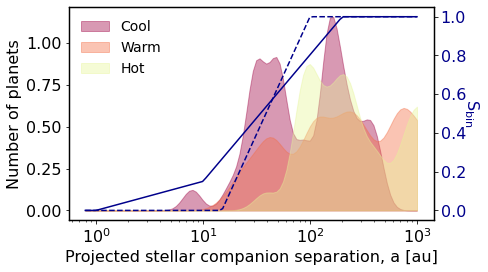

In [6]:
from scipy.stats import gaussian_kde

# ----------------------------------------------
# Set-up
# ----------------------------------------------

fig, ax1 = plt.subplots(figsize=(7, 4))

# defining the limits of the semi-major axis
a_values = np.logspace(-0.1,3, 100)
bins = np.logspace(np.log10(a_values.min()), np.log10(a_values.max()), 15)

# calculate suppression factors
S_values = suppression_factor(a_values)
S_values2 = suppression_factor_simple(a_values)


# ----------------------------------------------
# First axis -- histogram of planet radii
# ----------------------------------------------



# define the samples
cool = db_filtered['SepAU'][db_filtered['Teff1']<4500] # super-Earths
warm = db_filtered['SepAU'][(db_filtered['Teff1']>5000) & (db_filtered['Teff1']<5800)] # in-betweens
hot = db_filtered['SepAU'][db_filtered['Teff1']>6500] # mini-Neptunes

def calc_pdf(sample):
    kde = gaussian_kde(np.log10(sample), bw_method=0.2)
    pdf = kde(np.log10(a_values))
    return pdf

ax1.fill_between(a_values, calc_pdf(cool), color='#9e0142', alpha=0.4,
                 label='Cool')
ax1.fill_between(a_values, calc_pdf(warm), color='#f46d43', alpha=0.4,
                 label='Warm')
ax1.fill_between(a_values, calc_pdf(hot), color='#e6f598', alpha=0.4,
                 label='Hot')


ax1.set_xscale('log') # Set the x-axis to logarithmic scale
ax1.set_ylabel('Number of planets', color='k')
ax1.tick_params(axis='y', labelcolor='k')

ax1.set_xlabel('Projected stellar companion separation, a [au]')
plt.legend(edgecolor='None', facecolor='w', loc='upper left')


# ----------------------------------------------
# Second axis -- the suppression equation
# ----------------------------------------------

ax2 = ax1.twinx()

ax2.plot(a_values, S_values, color='darkblue', linestyle='-', label='Suppression Factor')
ax2.plot(a_values, S_values2, color='darkblue', linestyle='--', label='Suppression Factor')
ax2.tick_params(axis='y', labelcolor='darkblue')

ax2.set_ylabel('$S_\mathrm{bin}$', rotation=270, color='darkblue', labelpad=15)


# ----------------------------------------------
# Adjust and save
# ----------------------------------------------

plt.xscale('log')
plt.tight_layout()
#plt.savefig('overview.png')